In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT

In [2]:
df_scores1920 = pd.read_html('https://fbref.com/en/squads/32f3ee20/2019-2020/c20/Monchengladbach-Stats-Bundesliga#all_matchlogs')
df_scores2021 = pd.read_html('https://fbref.com/en/squads/32f3ee20/2020-2021/c20/Monchengladbach-Stats-Bundesliga#all_matchlogs')
df_scores2122 = pd.read_html('https://fbref.com/en/squads/32f3ee20/2021-2022/c20/Monchengladbach-Stats-Bundesliga#all_matchlogs')
df_scores2223 = pd.read_html('https://fbref.com/en/squads/32f3ee20/2022-2023/c20/Monchengladbach-Stats-Bundesliga#all_matchlogs')

# PREPROCESSING

## Season 19/20

In [3]:
df_scores1920 = df_scores1920[1]
df_scores1920.insert(0, "Matchday", range(1, 1 + len(df_scores1920)))
df_scores1920.insert(1, 'Season' , '19/20')
df_scores1920 = df_scores1920.drop(['Match Report', 'Notes', 'Round'], axis=1)
df_scores1920.loc[df_scores1920['Result'] == 'W', 'Points'] = '3' 
df_scores1920.loc[df_scores1920['Result'] == 'D', 'Points'] = '1' 
df_scores1920.loc[df_scores1920['Result'] == 'L', 'Points'] = '0' 

## Season 20/21

In [4]:
df_scores2021 = df_scores2021[1]
df_scores2021.insert(0, "Matchday", range(1, 1 + len(df_scores2021)))
df_scores2021.insert(1, 'Season' , '20/21')
df_scores2021.loc[df_scores2021['Result'] == 'W', 'Points'] = '3' 
df_scores2021.loc[df_scores2021['Result'] == 'D', 'Points'] = '1' 
df_scores2021.loc[df_scores2021['Result'] == 'L', 'Points'] = '0' 
df_scores2021 = df_scores2021.drop(['Match Report', 'Notes', 'Round'], axis=1)

## Season 21/22

In [5]:
df_scores2122 = df_scores2122[1]
df_scores2122.insert(0, "Matchday", range(1, 1 + len(df_scores2122)))
df_scores2122.insert(1, 'Season' , '21/22')
df_scores2122.loc[df_scores2122['Result'] == 'W', 'Points'] = '3' 
df_scores2122.loc[df_scores2122['Result'] == 'D', 'Points'] = '1' 
df_scores2122.loc[df_scores2122['Result'] == 'L', 'Points'] = '0' 
df_scores2122 = df_scores2122.drop(['Match Report', 'Notes', 'Round'], axis=1)

## Season 22/23

In [6]:
df_scores2223 = df_scores2223[1]
df_scores2223.insert(0, "Matchday", range(1, 1 + len(df_scores2223)))
df_scores2223.insert(1, 'Season' , '22/23')
df_scores2223.loc[df_scores2223['Result'] == 'W', 'Points'] = '3' 
df_scores2223.loc[df_scores2223['Result'] == 'D', 'Points'] = '1' 
df_scores2223.loc[df_scores2223['Result'] == 'L', 'Points'] = '0' 
df_scores2223 = df_scores2223.drop(['Match Report', 'Notes', 'Round'], axis=1)

# Last four seasons

In [7]:
dataframes = [df_scores1920, df_scores2021, df_scores2122, df_scores2223]
df_last4seasons = pd.concat(dataframes)

## Fridays

In [8]:
df_fridays = df_last4seasons.loc[df_last4seasons['Day'] == 'Fri']
df_fridays = df_fridays.dropna(subset=['Result'])

## Saturdays

In [9]:
df_saturday_noon = df_last4seasons.loc[(df_last4seasons['Day'] == 'Sat') & (df_last4seasons['Time'] == '15:30')]
df_saturday_noon = df_saturday_noon.dropna(subset=['Result'])

In [10]:
df_saturday_evening = df_last4seasons.loc[(df_last4seasons['Day'] == 'Sat') & (df_last4seasons['Time'] == '18:30')]
df_saturday_evening = df_saturday_evening.dropna(subset=['Result'])

In [11]:
df_saturdays = [df_saturday_noon, df_saturday_evening]
df_saturdays = pd.concat(df_saturdays)

## Sundays

In [12]:
df_sunday_noon = df_last4seasons.loc[(df_last4seasons['Day'] == 'Sun') & ((df_last4seasons['Time'] == '15:30') | (df_last4seasons['Time'] == '13:30'))]
df_sunday_noon = df_sunday_noon.dropna(subset=['Result'])

In [13]:
df_sunday_evening = df_last4seasons.loc[(df_last4seasons['Day'] == 'Sun') & ((df_last4seasons['Time'] == '17:30') | (df_last4seasons['Time'] == '18:00') | (df_last4seasons['Time'] == '19:30'))]
df_sunday_evening = df_sunday_evening.dropna(subset=['Result'])

In [14]:
df_sundays = [df_sunday_noon, df_sunday_evening]
df_sundays = pd.concat(df_sundays)

## Weekgames

In [15]:
df_weekgames = df_last4seasons.loc[(df_last4seasons['Day'] != 'Fri') & (df_last4seasons['Day'] != 'Sat') & (df_last4seasons['Day'] != 'Sun')]

## Points per game

## Fridays

In [16]:
df_fridays = df_fridays.astype({'Points':'int'})
quantity_fridays = len(df_fridays.index)
print("Anzahl Freitagsspiele: " , quantity_fridays)
points_fridays_total = (df_fridays['Points'].sum())
print("Punkte Freitags gesamt: " , points_fridays_total)
ppg_fridays = points_fridays_total / len(df_fridays)
print("Punkte Freitags pro Spiel: " , ppg_fridays)

Anzahl Freitagsspiele:  13
Punkte Freitags gesamt:  23
Punkte Freitags pro Spiel:  1.7692307692307692


## Saturdays

In [17]:
df_saturdays = df_saturdays.astype({'Points':'int'})
quantity_saturdays = len(df_saturdays.index)
print("Anzahl Samstagsspiele: " , quantity_saturdays)
points_saturdays_total = (df_saturdays['Points'].sum())
print("Punkte Samstags gesamt: " , points_saturdays_total)
ppg_saturdays = points_saturdays_total / len(df_saturdays)
print("Punkte Samstags pro Spiel: " , ppg_saturdays)

Anzahl Samstagsspiele:  74
Punkte Samstags gesamt:  110
Punkte Samstags pro Spiel:  1.4864864864864864


## Sundays

In [18]:
df_sundays = df_sundays.astype({'Points':'int'})
quantity_sundays = len(df_sundays.index)
print("Anzahl Sonntagsspiele: " , quantity_sundays)
points_sundays_total = (df_sundays['Points'].sum())
print("Punkte Sonntags gesamt: " , points_sundays_total)
ppg_sundays = points_sundays_total / len(df_sundays)
print("Punkte Sonntags pro Spiel: " , ppg_sundays)

Anzahl Sonntagsspiele:  23
Punkte Sonntags gesamt:  34
Punkte Sonntags pro Spiel:  1.4782608695652173


## Weekdays

In [19]:
df_weekgames = df_weekgames.astype({'Points':'int'})
quantity_weekgames = len(df_weekgames.index)
print("Anzahl Wochentagsspiele: " , quantity_weekgames)
points_weekgames_total = (df_weekgames['Points'].sum())
print("Punkte Wochentags gesamt: " , points_weekgames_total)
ppg_weekgames = points_weekgames_total / len(df_weekgames)
print("Punkte Wochentags pro Spiel: " , ppg_weekgames)

Anzahl Wochentagsspiele:  11
Punkte Wochentags gesamt:  17
Punkte Wochentags pro Spiel:  1.5454545454545454


## Sum results in dataframe

In [20]:
columns = ['Wochentag', 'Anzahl Spiele', 'Punkte gesamt', 'Punkte pro Spiel']
rows = ['Freitag', 'Samstag', 'Sonntag', 'Wochentag']
data = [
    ['Freitag', quantity_fridays, points_fridays_total, ppg_fridays],
    ['Samstag', quantity_saturdays, points_saturdays_total, ppg_saturdays],
    ['Sonntag', quantity_sundays, points_sundays_total, ppg_sundays],
    ['Wochentags', quantity_weekgames, points_weekgames_total, ppg_weekgames],
    ]
comparison = pd.DataFrame(data, columns= columns)


In [21]:
sum = comparison.sum()
sum.name = 'Summe'
comparison = comparison.append(sum.transpose())

/var/folders/4b/3hf4yyw565v_s647k9h0y9m40000gn/T/ipykernel_54776/3038282994.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append(sum.transpose())


In [22]:
display(comparison)
comparison.at['Summe','Wochentag'] = "Summe"
comparison.at['Summe','Punkte pro Spiel'] = (comparison.at['Summe','Punkte gesamt'] / comparison.at['Summe','Anzahl Spiele'])

,Wochentag,Anzahl Spiele,Punkte gesamt,Punkte pro Spiel
0,Freitag,13,23,1.769231
1,Samstag,74,110,1.486486
2,Sonntag,23,34,1.478261
3,Wochentags,11,17,1.545455
Summe,FreitagSamstagSonntagWochentags,121,184,6.279433


In [23]:
comparison

,Wochentag,Anzahl Spiele,Punkte gesamt,Punkte pro Spiel
0,Freitag,13,23,1.769231
1,Samstag,74,110,1.486486
2,Sonntag,23,34,1.478261
3,Wochentags,11,17,1.545455
Summe,Summe,121,184,1.520661


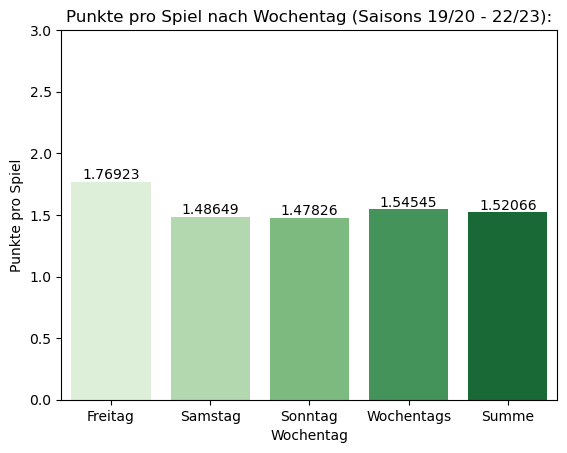

In [24]:
fig, ax = plt.subplots()
plot_ppg = sns.barplot(data=comparison, x="Wochentag", y="Punkte pro Spiel", palette="Greens").set(title="Punkte pro Spiel nach Wochentag (Saisons 19/20 - 22/23):")
ax.set_ylim(0, 3)
for i in ax.containers:
    ax.bar_label(i,)
